<a href="https://colab.research.google.com/github/Dhamu785/AI-scratch/blob/main/PyTorch/01_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Types of data**
Type-1 | Type-2 | Type-3
---|---|---|
Numerical | Image | Video
Text | Audio | DNA

## **1. Import libaries**

In [1]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import pandas as pd
import os

In [2]:
!nvidia-smi

Sat Jun 29 20:45:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **2. Create dataset**

In [3]:
start = 0
stop = 1
step = 0.02

weight = 0.3
bias = 0.7

X = t.arange(start, stop, step)
X

tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
        0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
        0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
        0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
        0.7200, 0.7400, 0.7600, 0.7800, 0.8000, 0.8200, 0.8400, 0.8600, 0.8800,
        0.9000, 0.9200, 0.9400, 0.9600, 0.9800])

In [4]:
X = X.unsqueeze(1)
y = weight * X + bias
# my_y = weight * X + (weight+0.6) * X + bias
y[:5]

tensor([[0.7000],
        [0.7060],
        [0.7120],
        [0.7180],
        [0.7240]])

## **3. Train test split**

In [5]:
train_data = 0.8*len(X)
test_data = 0.2*len(X)

print(f'Total data in train and test data = {train_data, test_data}')
x_train = X[:int(train_data)]
x_test = X[int(train_data):]

y_train = y[:int(train_data)]
y_test = y[int(train_data):]
print(len(x_train), len(x_test), len(y_train), len(y_test))

Total data in train and test data = (40.0, 10.0)
40 10 40 10


## **4. Plot the data**

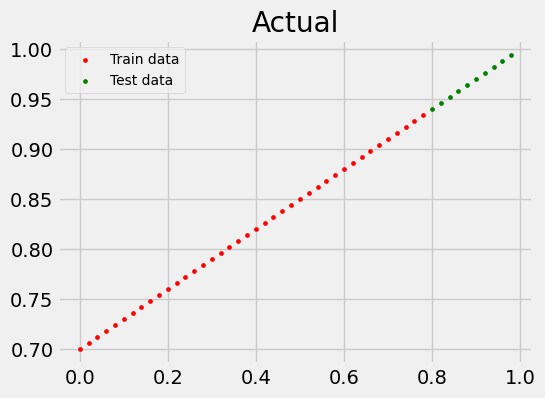

In [6]:
def view_data(train_data = x_train, train_label = y_train, test_data = x_test, test_label = y_test, prediction=None):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(train_data, train_label, c='r', s=8, label='Train data')
    plt.scatter(test_data, test_label, s=8, c='g', label='Test data')
    plt.title("Actual")
    if prediction != None:
        plt.subplot(1,2,2)
        plt.scatter(train_data, train_label, c='r', s=4, label='Train data')
        plt.scatter(test_data, test_label, s=8, c='g', label='Test data')
        plt.scatter(test_data, prediction, s=8, c='b', label='predictions')
        plt.title('With predictions')
    plt.legend(prop={'size':10})
    plt.show()

view_data()

## **5. Creating the model class**
- ["Super" - use case in constructor](https://stackoverflow.com/a/41384524/15980054)

In [7]:
class A:
     def __init__(self):
         print("I'm from A")

class B(A):
    def __init__(self):
        print("I'm from B")
        super().__init__()

class C(A):
    def __init__(self):
        print("I'm from C")
        super().__init__()

class D(B):
    def __init__(self):
        print("I'm from D")
        B.__init__(self)
        # super().__init__()

d = D()

I'm from D
I'm from B
I'm from A


In [8]:
# Model class

class linear_regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(t.randn(1, dtype=t.float, requires_grad=True))
        self.bias = nn.Parameter(t.randn(1, dtype=t.float32, requires_grad=True))

    def forward(self, x:t.Tensor) -> t.Tensor:
        return self.weights * x + self.bias

### **5.1 Exploring the parameters in the created model**

In [9]:
t.manual_seed(42)

model_0 = linear_regression()

In [10]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### **5.2 Model prediction without training**

In [12]:
with t.inference_mode():
    y_pred = model_0(x_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

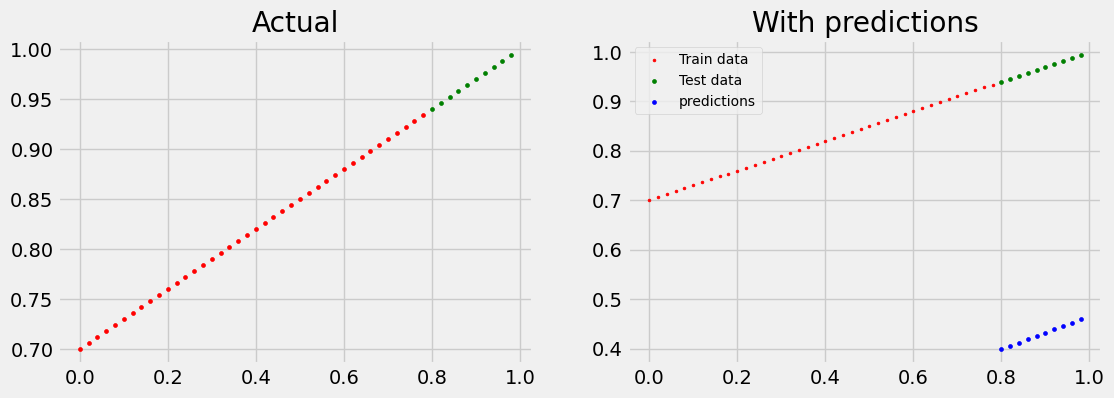

In [13]:
view_data(prediction=y_pred)

### **5.3 Model training loop**

In [14]:
# setting up the loss function and optimizer

loss = nn.L1Loss() # MAE
opt = t.optim.SGD(params=model_0.parameters(), lr=0.01)

In [15]:
print(f"Actual : {weight = } , {bias = }")
print(f"Random : {model_0.state_dict() = }")

Actual : weight = 0.3 , bias = 0.7
Random : model_0.state_dict() = OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [16]:
# 1. Forward pass
# 2. calculate loss
# 3. Zero-grad
# 4. Back propagation
# 5. Optimazation

track = {"epoch": [], "train_loss":[], "test_loss":[], "weight":[], "bias":[]}

def train_mdl(epochs=10):
    for epoch in range(epochs):
        model_0.train()
        y_pred = model_0(x_train)
        los = loss(y_train, y_pred)
        opt.zero_grad()
        los.backward()
        opt.step()
        model_0.eval()
        with t.inference_mode():
            test_loss = loss(y_test, model_0(x_test))

        track['epoch'].append(epoch)
        track["train_loss"].append(round(float(los), 4))
        track["test_loss"].append(round(float(test_loss), 4))
        track["weight"].append(round(float(model_0.state_dict()['weights']), 4))
        track["bias"].append(round(float(model_0.state_dict()['bias']), 4))

        if epoch % 10 == 0:
            print(f"Epoch = {epoch}, {los = }, {test_loss = }, Weight = {model_0.state_dict()['weights']}, Bias = {model_0.state_dict()['bias']}")


In [17]:
train_mdl(100)

Epoch = 0, los = tensor(0.5569, grad_fn=<MeanBackward0>), test_loss = tensor(0.5251), Weight = tensor([0.3406]), Bias = tensor([0.1388])
Epoch = 10, los = tensor(0.4417, grad_fn=<MeanBackward0>), test_loss = tensor(0.3904), Weight = tensor([0.3796]), Bias = tensor([0.2388])
Epoch = 20, los = tensor(0.3265, grad_fn=<MeanBackward0>), test_loss = tensor(0.2556), Weight = tensor([0.4186]), Bias = tensor([0.3388])
Epoch = 30, los = tensor(0.2113, grad_fn=<MeanBackward0>), test_loss = tensor(0.1209), Weight = tensor([0.4576]), Bias = tensor([0.4388])
Epoch = 40, los = tensor(0.0960, grad_fn=<MeanBackward0>), test_loss = tensor(0.0146), Weight = tensor([0.4966]), Bias = tensor([0.5388])
Epoch = 50, los = tensor(0.0452, grad_fn=<MeanBackward0>), test_loss = tensor(0.0818), Weight = tensor([0.5073]), Bias = tensor([0.5973])
Epoch = 60, los = tensor(0.0398, grad_fn=<MeanBackward0>), test_loss = tensor(0.0888), Weight = tensor([0.4950]), Bias = tensor([0.6153])
Epoch = 70, los = tensor(0.0363, gr

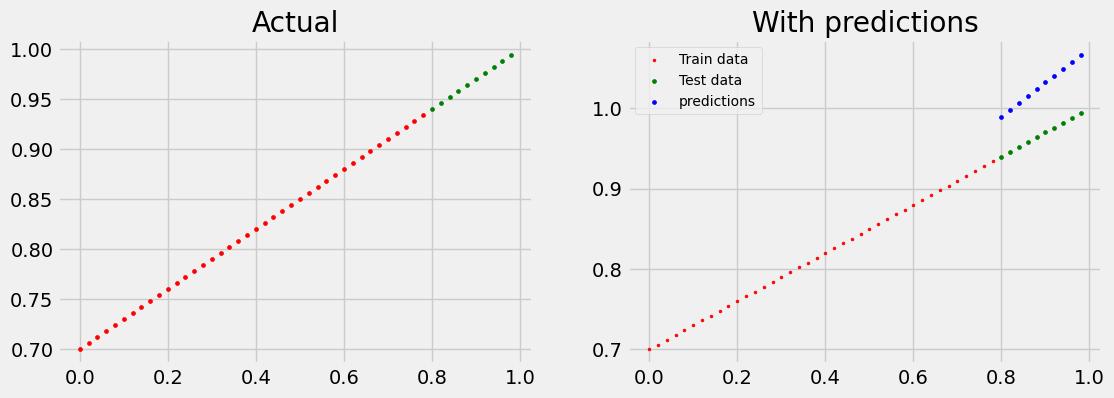

In [18]:
with t.inference_mode():
    y_pred = model_0(x_test)

view_data(prediction=y_pred)

In [19]:
df = pd.DataFrame(track)
df.head()

,epoch,train_loss,test_loss,weight,bias
0,0,0.5569,0.5251,0.3406,0.1388
1,1,0.5454,0.5116,0.3445,0.1488
2,2,0.5338,0.4981,0.3484,0.1588
3,3,0.5223,0.4847,0.3523,0.1688
4,4,0.5108,0.4712,0.3562,0.1788


### **5.4 Data visualization**

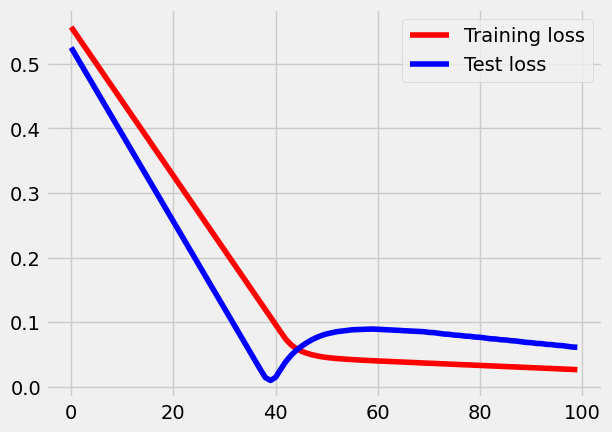

In [20]:
plt.plot(df['epoch'], df['train_loss'], c='r', label="Training loss")
plt.plot(df['epoch'], df['test_loss'], c='b', label="Test loss")
plt.legend()
# plt.yscale("log")
plt.show()

## **6. Saving and loading the model**

In [22]:
# Save the model

path = '/content/drive/MyDrive/Colab Notebooks YouTube tutorials/8.1 PyTorch/01_Daniel Bourke/models'
name = '01_workflow.pth'

model_path = os.path.join(path,name)
t.save(model_0.state_dict(), model_path)

print("Model saved succesfully...!")

Model saved succesfully...!


In [23]:
# Load model

loaded_model_0 = linear_regression()
print(f"Before loading the model = {loaded_model_0.state_dict()}")

loaded_model_0.load_state_dict(t.load(model_path))
print(f"After loading the model = {loaded_model_0.state_dict()}")

Before loading the model = OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])
After loading the model = OrderedDict([('weights', tensor([0.4294])), ('bias', tensor([0.6458]))])


In [24]:
# Checking the saved and loaded model is performing the same

sample_1 = model_0(x_test)
sample_2 = loaded_model_0(x_test)

sample_1 == sample_2

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## **7. Creating Model-2**

In [21]:
# Importing libaries

import torch as t
from torch import nn
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [22]:
# Setting up the device

device = 'cuda' if t.cuda.is_available() else 'cpu'
print(f"{device = }")

device = 'cuda'


In [23]:
# Generating the data

weight = 0.42
bias = 0.68

X = t.arange(0,1,0.02, device=device).unsqueeze(1)
y = weight * X + bias

train = int(0.8 * len(X))

x_tain = X[:train]
y_train = y[:train]

x_test = X[train:]
y_test = y[train:]
print(f"{len(x_train) = }, {len(y_train) = }, {len(x_test) = }, {len(y_test) = }")

len(x_train) = 40, len(y_train) = 40, len(x_test) = 10, len(y_test) = 10


In [24]:
x_train.device

device(type='cpu')

In [25]:
# Build the model

class LinearRegressionv2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1, device=device)

    def forward(self, x:t.Tensor) -> t.Tensor:
        return self.linear_layer(x)

t.manual_seed(42)
model_1 = LinearRegressionv2()
print(f"{model_1 = }, {model_1.state_dict()}")

model_1 = LinearRegressionv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
), OrderedDict([('linear_layer.weight', tensor([[0.2259]], device='cuda:0')), ('linear_layer.bias', tensor([0.9754], device='cuda:0'))])


In [26]:
# Check the models device

next(model_1.parameters()).device

device(type='cuda', index=0)

In [30]:
model_1.to('cpu')
next(model_1.parameters()).device

device(type='cpu')

In [42]:
model_1.to('cuda')
next(model_1.parameters()).device

device(type='cuda', index=0)

In [27]:
# Set loss and optimizers

los_fun = nn.L1Loss()
optim = t.optim.SGD(params = model_1.parameters(), lr=0.01)

In [28]:
# Setting the training loop

x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

def train_loop1(epochs=10):
    for epoch in range(epochs):
        model_1.train()
        pred = model_1(x_train)
        ls = los_fun(y_train, pred)
        optim.zero_grad()
        ls.backward()
        optim.step()

        model_1.eval()
        with t.inference_mode():
            y_pred = model_1(x_test)
            test_ls = los_fun(y_pred, y_test)

        if epoch % 10 == 0:
            print(f"Epochs = {epoch}, Train loss = {ls}, Test loss = {test_ls}")

In [29]:
train_loop1(100)

Epochs = 0, Train loss = 0.21974597871303558, Test loss = 0.10923486202955246
Epochs = 10, Train loss = 0.10453605651855469, Test loss = 0.02547510899603367
Epochs = 20, Train loss = 0.05532199144363403, Test loss = 0.09336455166339874
Epochs = 30, Train loss = 0.04868365451693535, Test loss = 0.1054038405418396
Epochs = 40, Train loss = 0.04500557482242584, Test loss = 0.10264437645673752
Epochs = 50, Train loss = 0.04152730852365494, Test loss = 0.09643267095088959
Epochs = 60, Train loss = 0.038090940564870834, Test loss = 0.08816034346818924
Epochs = 70, Train loss = 0.03465380519628525, Test loss = 0.08057490736246109
Epochs = 80, Train loss = 0.031225353479385376, Test loss = 0.07230256497859955
Epochs = 90, Train loss = 0.027787311002612114, Test loss = 0.06403019279241562


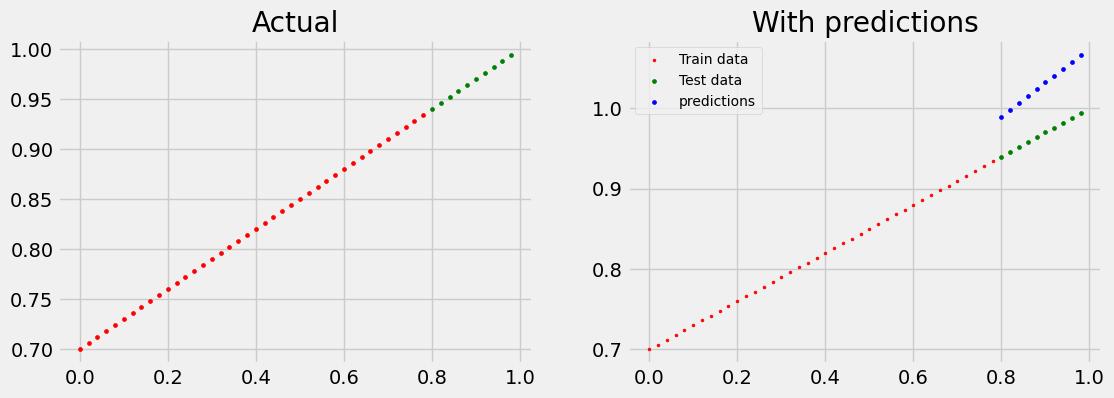

In [33]:
# Visualize the data
model_1.eval()

# Make predictions on the test data
with t.inference_mode():
    y_preds = model_1(x_test)
prediction=y_pred.to('cpu').detach()
view_data(prediction=prediction)